In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/ramil/Documents/UBA/(75.06) Organización de Datos/TPS/TP1/Entrenamieto_ECI_2020.csv')


# Densidad del precio

In [71]:
densidad = df[['Price', 'Currency']]
densidad = densidad.loc[(densidad['Price'] != 'None') & (densidad['Price'] != 'Other')]
densidad

,Price,Currency
3,0.42,USD
4,0.42,USD
5,0.42,USD
956,0.27,EUR
3202,0.29,EUR
...,...,...
15984,0.265,EUR
16055,0.245,EUR
16060,0.3,USD
16061,0.3,USD


In [72]:
densidad_usd = densidad[['Price', 'Currency']].loc[densidad['Currency'] == 'USD']
densidad_eur = densidad[['Price', 'Currency']].loc[densidad['Currency'] == 'EUR']
densidad_eur

,Price,Currency
956,0.27,EUR
3202,0.29,EUR
5890,0.34,EUR
5913,0.35,EUR
6886,0.335,EUR
...,...,...
15893,0.225,EUR
15898,0.215,EUR
15984,0.265,EUR
16055,0.245,EUR


In [73]:

densidad_usd = densidad_usd.rename(columns={'Price':'Precio(USD)'})
densidad_eur = densidad_eur.rename(columns={'Price':'Precio(EUR)'})

In [74]:
densidad_eur = densidad_eur.groupby('Precio(EUR)').agg({'Currency':'count'})
densidad_usd = densidad_usd.groupby('Precio(USD)').agg({'Currency':'count'})

In [75]:
densidad_usd = densidad_usd.reset_index()
densidad_usd = densidad_usd.rename(columns = {'Currency':'Cantidad'})

In [76]:
densidad_eur = densidad_eur.reset_index()
densidad_eur = densidad_eur.rename(columns = {'Currency':'Cantidad'})

In [77]:
densidad_eur

,Precio(EUR),Cantidad
0,0.2,4
1,0.21,1
2,0.215,2
3,0.22,6
4,0.225,3
5,0.23,13
6,0.235,2
7,0.24,27
8,0.245,8
9,0.25,5


[Text(0, 0.5, 'Distribución'), Text(0.5, 0, 'Precio')]

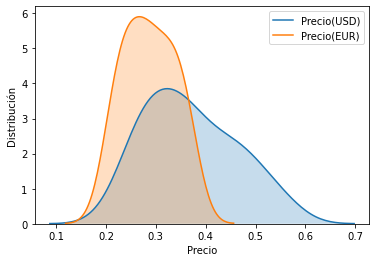

In [83]:
ax = sns.kdeplot(data=densidad_usd['Precio(USD)'], shade=True)
ax = sns.kdeplot(data=densidad_eur['Precio(EUR)'], shade=True)
ax.set(xlabel = 'Precio', ylabel = 'Distribución')

# Cuatrimestre con más oportunidades exitosas

Toma en cuenta los cuatrimestres de los 4 años que aparecen en el data set

In [37]:
cuatrimestres = df[['Delivery_Quarter', 'Stage']]
cuatrimestres = cuatrimestres.loc[cuatrimestres['Stage'] == 'Closed Won']
cuatrimestres

,Delivery_Quarter,Stage
1,Q1,Closed Won
2,Q1,Closed Won
7,Q1,Closed Won
23,Q1,Closed Won
63,Q1,Closed Won
...,...,...
16937,Q1,Closed Won
16939,Q2,Closed Won
16942,Q1,Closed Won
16943,Q2,Closed Won


[Text(0, 0.5, 'Cuatrimestre'), Text(0.5, 0, 'Cantidad')]

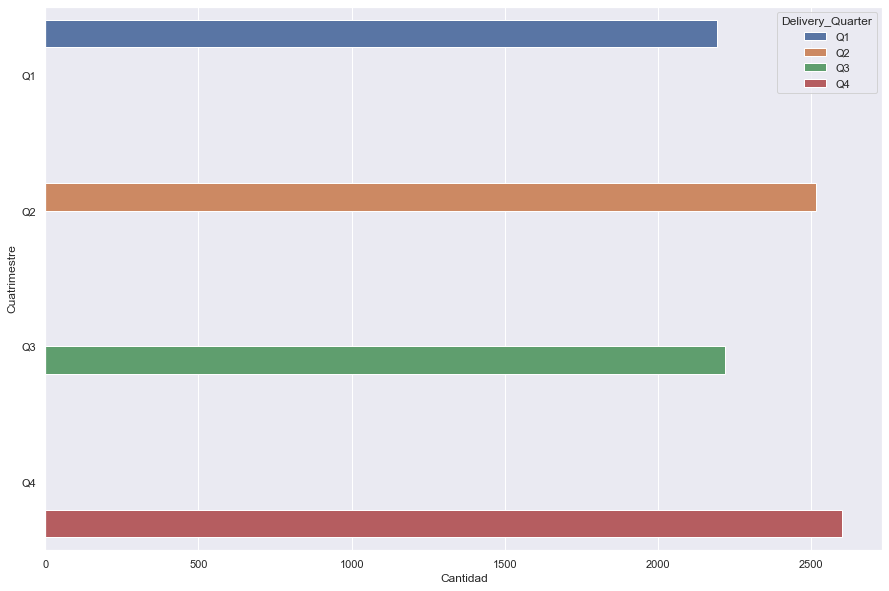

In [50]:
plt.rcParams['figure.figsize'] = (15, 10)
g = sns.countplot(y = 'Delivery_Quarter', data = cuatrimestres, hue = 'Delivery_Quarter')
g.set(xlabel = 'Cantidad', ylabel = 'Cuatrimestre')